# Linear Algebra: The Science of Lists, Arrows, and Space

## Motivation for the Vector Concept

Geometrically, it is often the case that we can model a property assigned to some object as a *directed arrow*. The following are examples of phenomena that can be modeled using such an arrow:

1.	Position 
2.	Displacement
3.	Velocity
4.	Acceleration
5.	Force

Careful consideration shows that each of the above examples is associated with both a *magnitude* and a *direction*. For example, press down on a desk, and notice that a force is always applied in a certain direction with a certain magnitude. Notice as well that the direction and magnitude of a force are *independent* of each other, in the sense that *each can be varied without affecting the other*.

*Note*: The idea of a vector became more abstract in the 20th century with the introduction by Peano of the notion of a vector space, which is a tuple of the form (V, +, x) consisting of a set together with some rules that dictate how the elements of that set may be combined with each other and multiplied by numbers from some field. 

Vectors are now defined as any mathematical object that satisfies the precise definition of a vector space. The advantage of this more abstract approach is that it allows us to apply the same rules to many different kinds of mathematical objects. For eaxmple, we can have vector spaces of matrices and functions, despite the fact that matrices and functions have no obvious correspondence to two-dimensional arrows. Proving that certain propositions are true in *any* vector space allows us to avoid proving the same idea over and over again for different instantiations of the same vector space concept.

For now, we will focus on two-dimensional geometric directed arrows. To reason more precisely about geometric vectors, we associate each vector with a unique list of numbers. We do this by introducing a coordinate system. A coordinate system is simply a rule that tells us how to assign a unique label to each point in a given space. Although we can imagine infinitely many such labeling schemes, the simplest possible coordinate system starts with two number lines at right-angles to each other:

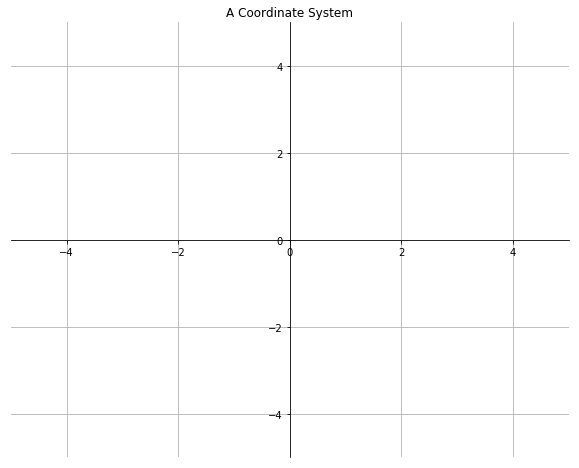

In [121]:
import matplotlib.pyplot as plt

def draw_coordinates ():
    fig, ax = plt.subplots (figsize=(10, 8))
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    ax.set(xlim=(-5, 5), ylim=(-5, 5))
    ax.set_title('A Coordinate System')
    ax.grid ()
    return ax
    
draw_coordinates ()
plt.show ()    

Once we have such a coordinate system, we can easily see the correspondence between numeric vectors and directed arrows:

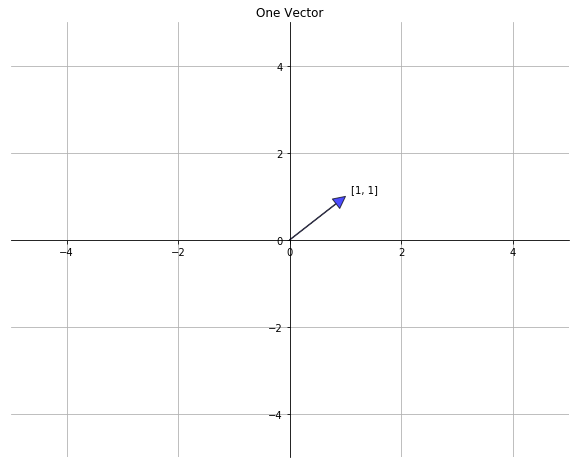

In [122]:
def draw_vectors (vectors, title=None, annotate=True):
    ax = draw_coordinates ()
    
    for vector in vectors:
        ax.annotate ('', xy=vector, xytext=(0, 0),
                     arrowprops=dict(
                                     facecolor='blue',
                                     shrink=0,
                                     alpha=0.7,
                                     width=0.5
                                    )
                     
                    )
        if annotate == True:
            ax.text (1.1 * vector[0], 1.1 * vector[1], str (vector))
    if title:
        ax.set_title(title)
    plt.show ()    
    
vectors = [ [1, 1] ]
draw_vectors (vectors, 'One Vector')

From the above, we can see that there is a one-to one correspondence between the list [1, 1] and the directed arrow whose tail is at the origin, and whose tip is at the point (1, 1) in the two-dimensional plane. The same is true of any vector in the plane. This one-to-one correspondence means that if we want to solve a given problem, we can choose either a geometric or algebraic representation, depending upon which is more convenient.

We can milk our above example to see how various arithmetic operations on lists correspond to geomertic operations on directed arrows. 

The first thing to note is that stretching a directed arrow by some factor *x* corresponds to multiplying each element of the corresponding list by the number *x*:

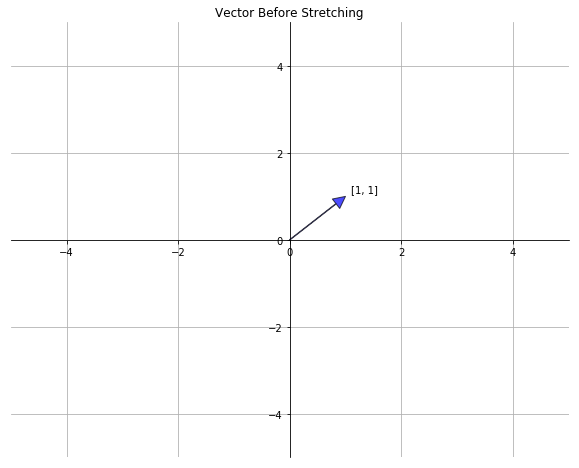

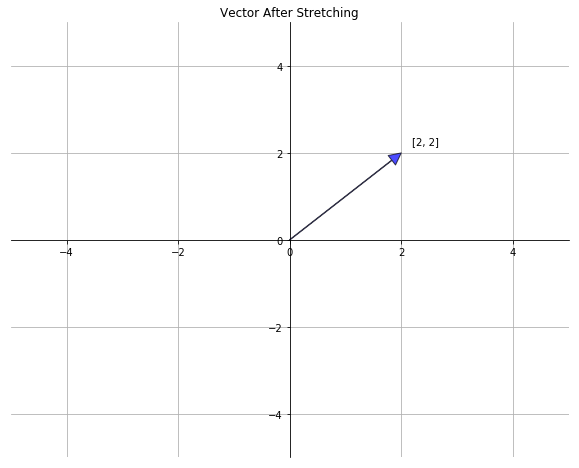

In [123]:
vectors = [ [1, 1] ]
draw_vectors (vectors, 'Vector Before Stretching')

vectors = [ [2*1, 2*1] ]
draw_vectors (vectors, 'Vector After Stretching')

Visually, we can see that the *magnitude* of the second vector is twice that of the first vector, and that both vectors have the same *direction*. We can measure this change in magnitude precisely by introducing a function which we call a *norm*. The following norm is based upon the Pythagorean theorem:

In [124]:
import math

def norm (vector): 
    return math.sqrt(sum(component**2 for component in vector))

print (f'\nthe norm of ([1, 1] is: {norm([1, 1])}')
print (f'\nthe norm of ([2, 2] is: {norm([2, 2])}')
twice_norm_1 = 2 *norm ([1, 1])
print (f'\n{norm([1, 1])} * 2 = {twice_norm_1}')


the norm of ([1, 1] is: 1.4142135623730951

the norm of ([2, 2] is: 2.8284271247461903

1.4142135623730951 * 2 = 2.8284271247461903


Instead of explicitly multiplying each element of a list by the same number, we usually use the shorthand of bringing that number to the front of the list and writing the scalar there. We call this shorthand notation "scalar multiplication". 

For example, the vector `2 * [1, 1]` is equivalent to the vector `[2*1, 2*1]` = `[2, 2]`.

Next, we note that multiplying a vector by a negative number corresponds to *reversing the direction* of the corresponding geometric vector without changing its magnitude:

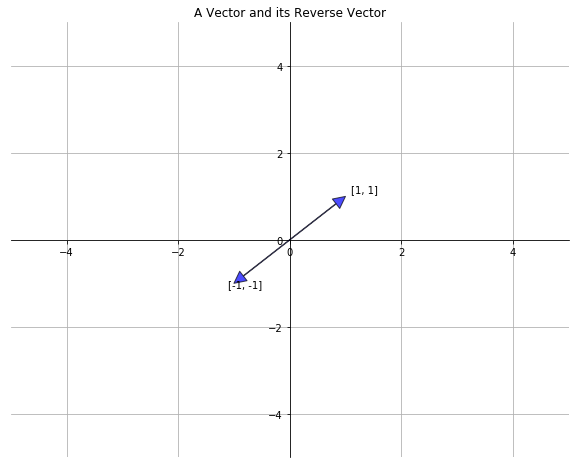

In [125]:
vectors = [ [1, 1], [-1, -1] ]
draw_vectors (vectors, 'A Vector and its Reverse Vector')

Multiplying a vector by a negative number other than -1 has the effect of changing both the magnitude *and* the direction of the vector simultaneously:

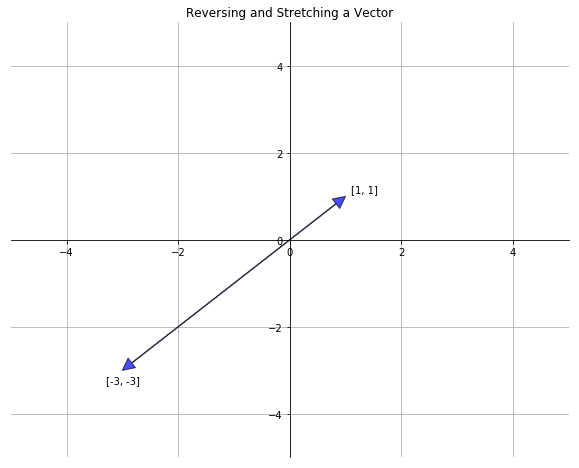

In [126]:
vectors = [ [1, 1], [-3, -3] ]
draw_vectors (vectors, 'Reversing and Stretching a Vector')

It turns out that one mathematical operation called *matrix multiplication* can accomplish rotating, reflecting, scaling, shearing, and projecting a vector. Just as a vector is a list of numbers, we can think of a *matrix* a list of vectors. In particular, we can think of a matrix as a list of column vectors. Each column vector of a matrix tells us the corresponding output of a *basis vector*. To better understand what this means, consider the two standard basis vectors:

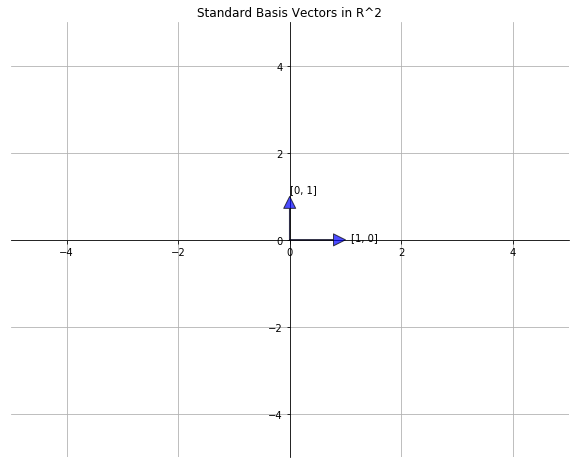

In [127]:
vectors = [ [1, 0], [0, 1] ]
draw_vectors (vectors, 'Standard Basis Vectors in R^2')

Now, consider the following example of matrix-vector multiplication:

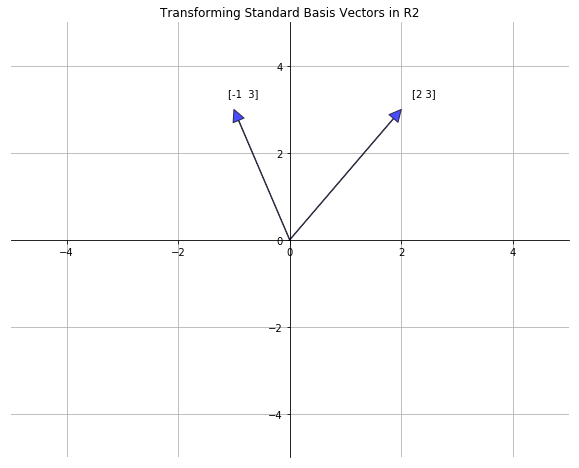

In [128]:
import numpy as np

v1 = [1, 0]
v2 = [0, 1]
vectors = [v1, v2]

B = np.array(
             [[2, -1],
              [3, 3]]
            )

product_1 = B@v1
product_2 = B@v2

results = [product_1, product_2] 
draw_vectors (results, 'Transforming Standard Basis Vectors in R2')

The above shows the geometric significance of a matrix: the first column of the matrix specifies the output of the first basis vector, and the second column of the matrix specifies the output of the second basis vector. Because any vector can be expressed as a linear combination of the basis vectors, specifying the output of each basis vectors is equivalent to specifying the output of any vector in the plane. In other words, instead of specifying how a given function acts on every vector in the plane, we need only specify how the function acts on the basis vectors and the effect of the function on any vector can be derived from how it acts on the basis vectors.

We can classify matrices according to the effects they have geometrically. 

A *diagonal matrix* only has numbers on its main diagonal, and zeros everywhere else. A diagonal matrix can: 

1. Rotate by flipping columns. 
2. Reflect by changing the sign of a column.  
3. Stretch by multiplying a column by a scalar.

For example, a diagonal matrix can stretch a vector as follows:

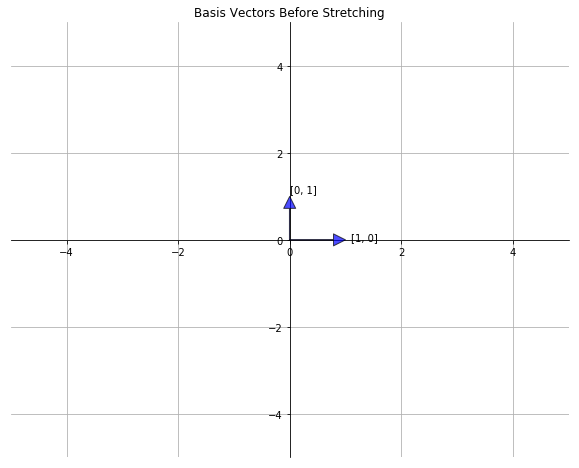

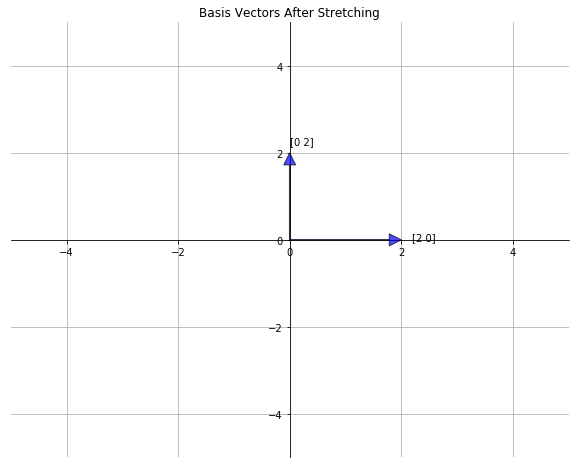

In [129]:
v1 = [1, 0]
v2 = [0, 1]
basis_vectors = [v1, v2]

A = np.array(
             [[2, 0],
              [0, 2]]
            )

product_1 = A@v1
product_2 = A@v2

results = [product_1, product_2] 

draw_vectors (basis_vectors, 'Basis Vectors Before Stretching')
draw_vectors (results, 'Basis Vectors After Stretching')

A shear matrix is so-named because it shears the unit square. We can achieve shear with one off-diagonal element:

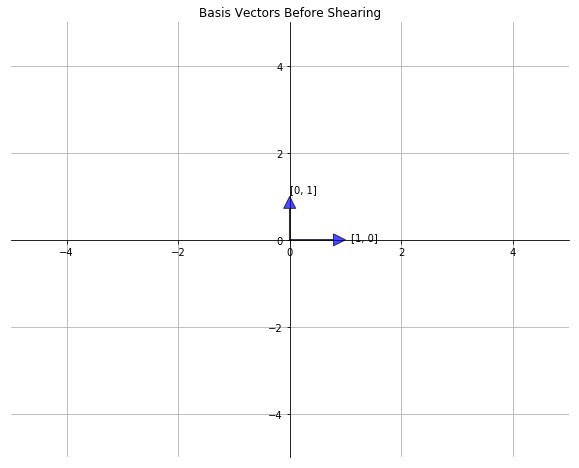

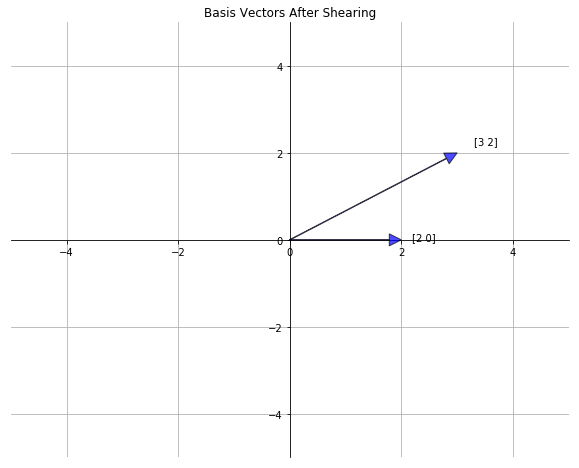

In [130]:
v1 = [1, 0]
v2 = [0, 1]
basis_vectors = [v1, v2]

A = np.array(
             [[2, 3],
              [0, 2]]
            )

product_1 = A@v1
product_2 = A@v2

results = [product_1, product_2] 

draw_vectors (basis_vectors, 'Basis Vectors Before Shearing')
draw_vectors (results, 'Basis Vectors After Shearing')

An orthogonal matrix A is a square matrix whose columns and rows are orthogonal unit vectors. Such matrices have the effect of rotating vectors. For example, we can use an orthogonal matrix to rotate vectors by 90 degrees:

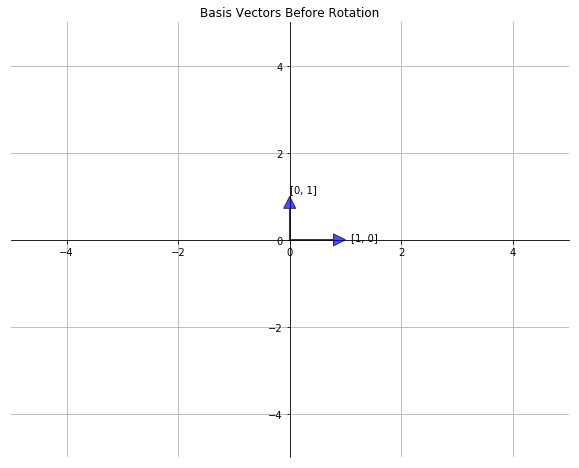

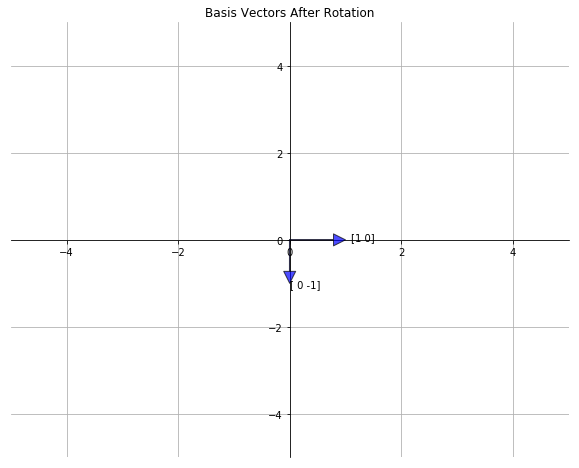

In [131]:
v1 = [1, 0]
v2 = [0, 1]
basis_vectors = [v1, v2]

A = np.array(
             [[0, 1],
              [-1, 0]]
            )

product_1 = A@v1
product_2 = A@v2

results = [product_1, product_2] 

draw_vectors (basis_vectors, 'Basis Vectors Before Rotation')
draw_vectors (results, 'Basis Vectors After Rotation')

In addition to matrix-vector multiplication, we can also define matrix-matrix multiplicaiton. The interpretation is in terms of function composition: The matrix multiplication A X B corresponds to first applying the matrix B to an input vector, and then applying the matrix B to the output of the first multiplication. 

For example, the following matrix multiplication corresponds to stretching a vector and then rotating it:

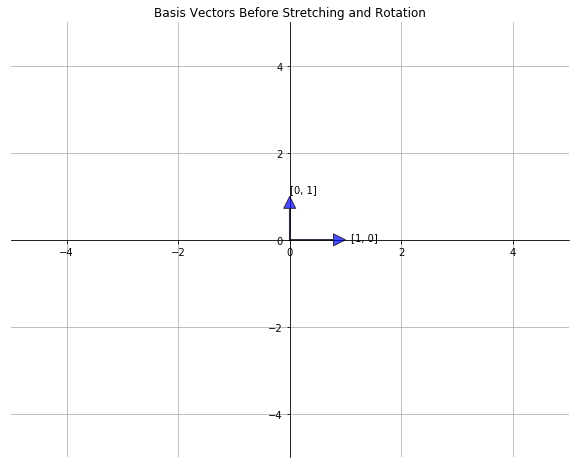

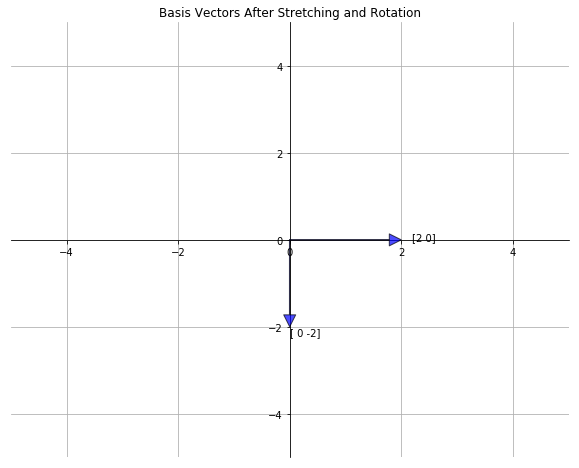

In [132]:
v1 = [1, 0]
v2 = [0, 1]

basis_vectors = [v1, v2]

A = np.array(
             [[2, 0],
              [0, 2]]
            )

B = np.array(
             [[0, 1],
              [-1, 0]]
            )

C = B@A

product_1 = C@v1
product_2 = C@v2

results = [product_1, product_2] 

draw_vectors (basis_vectors, 'Basis Vectors Before Stretching and Rotation')
draw_vectors (results, 'Basis Vectors After Stretching and Rotation')

The fact that matrix multiplication corresponds to composition of functions is important, because it implies that one matrix can sometimes be *factored* into multiple matrices. One important application of matrix factorization is the SVD decomposition, which says that any matrix can be factored into two orthogonal matrices (i.e two rotation matrices) and one diagonal matrix (i.e. a scaling matrix).

More formally, the SVD theorem says that any m x n matrix A can be factored as:

$A = USV^T$,

where:

1. $U$ is an m x n orthogonal matrix.
2. $V$ is an n x n orthogonal matrix.
3. S is an m x n diagonal matrix.

The diagonal non-zero elements of the matrix $S$ are called *singular values*.

initial matrix (U), A scaling matrix (sigma), and a rotation matrix (V).


Before we can understand the SVD, we need to take a step back and notice that given any matrix, there are two interesting questions we can ask:

1. Which input vectors retain the same direction after the matrix has acted on them, and by how much are those vectors stretched in that direction?
2. Which input vectors are stretched most by the Matrix transformation?

If the direction of a vector remains unchanged by a matrix A, then we call that vector an *eigenvalue* of the matrix A. For example:

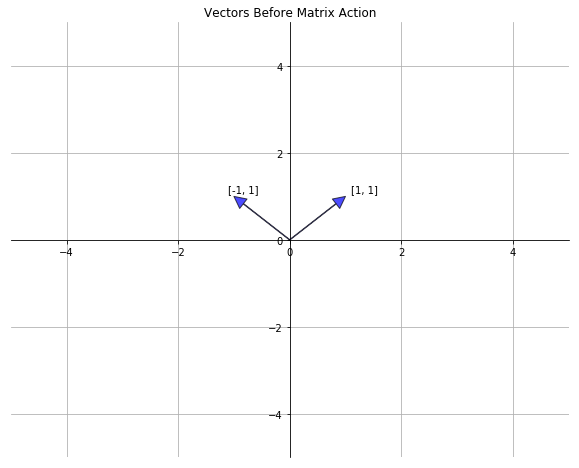

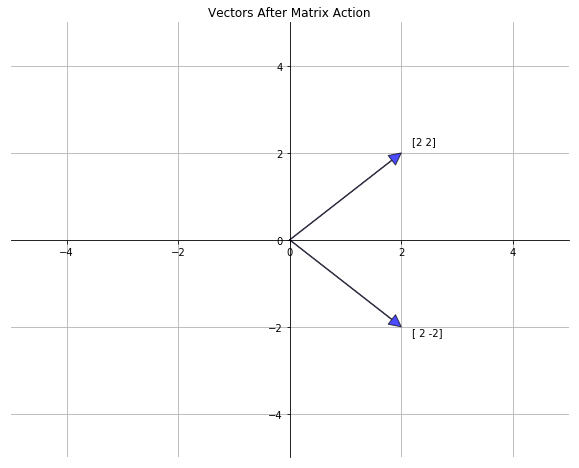

In [133]:
v1 = [1, 1]
v2 = [-1, 1]

vectors = [v1, v2]

A = np.array(
             [[0, 2],
              [2, 0]]
            )

product_1 = A@v1
product_2 = A@v2

results = [product_1, product_2] 

draw_vectors (vectors, 'Vectors Before Matrix Action')
draw_vectors (results, 'Vectors After Matrix Action')

From the above, we can see that the direction of the vector [1, 1] remains unchanged, but it is stretched by the matrix A. Therefore, we say that [1, 1] is an *eigenvector* of the matrix A.

However, knowing which vector's direction remains unchanged by a given matrix does not necessarily tell us which vectors are stretched most by the matrix A (even if the direction of the vector is changed by the matrix). 

So far, we have been analyzing matrix transformations from the perspective of two orthogonal vectors. However, it turns out that we can better understand the difference between which vectors are invariant with respect to direction and which vectors are stretched most by a matrix if we instead consider vectors whose tips lie on the unit circle:

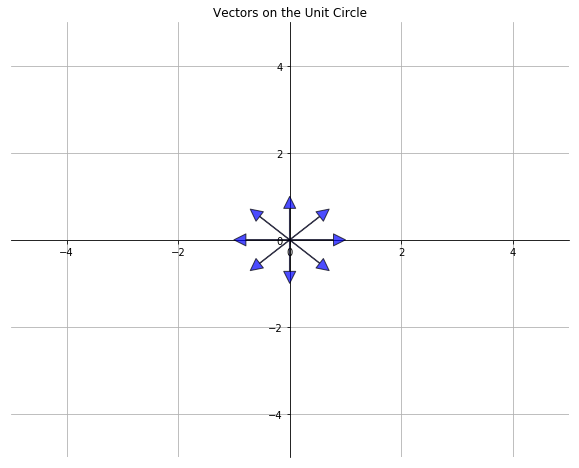

In [134]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([2, 2])
v4 = np.array([-2, 2])
v5 = np.array([-1, 0])
v6 = np.array([-5, -5])
v7 = np.array([5, -5])
v8 = np.array([0, -1])


# compute norms
v1_norm = np.linalg.norm(v1)
v2_norm = np.linalg.norm(v2)
v3_norm = np.linalg.norm(v3)
v4_norm = np.linalg.norm(v4)
v5_norm = np.linalg.norm(v5)
v6_norm = np.linalg.norm(v6)
v7_norm = np.linalg.norm(v7)
v8_norm = np.linalg.norm(v8)

# compute normed vectors
v1_normed = v1/ v1_norm
v2_normed = v2 / v2_norm 
v3_normed = v3 /v3_norm 
v4_normed = v4 /v4_norm
v5_normed = v5 /v5_norm
v6_normed = v6 /v6_norm
v7_normed = v7 /v7_norm
v8_normed = v8 /v8_norm


vectors = [v1_normed, v2_normed, v3_normed, v4_normed, v5_normed, v6_normed, v7_normed, v8_normed]
draw_vectors (vectors, 'Vectors on the Unit Circle', annotate=False)

Now, consider the action of the previous matrix on our unit vectors:

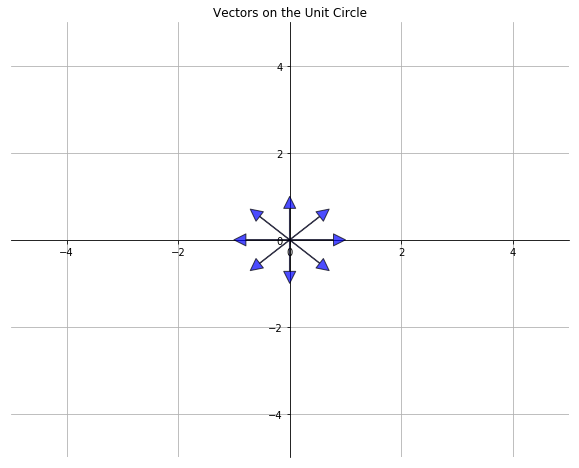

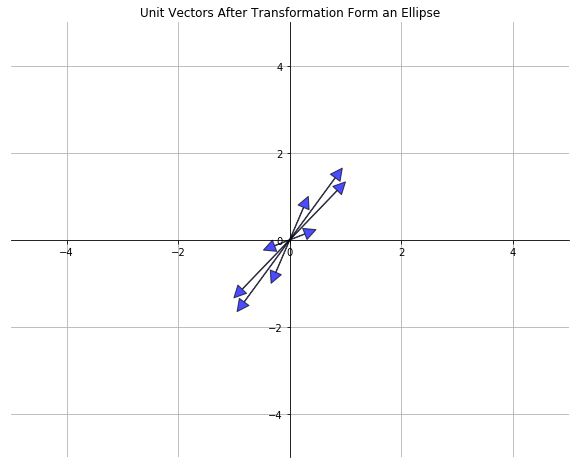

In [135]:
A = np.array(
             [[1, 1/3],
              [4/3, 1]]
            )

v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([2, 2])
v4 = np.array([-2, 2])
v5 = np.array([-1, 0])
v6 = np.array([-5, -5])
v7 = np.array([5, -5])
v8 = np.array([0, -1])

# compute norms
v1_norm = np.linalg.norm(v1)
v2_norm = np.linalg.norm(v2)
v3_norm = np.linalg.norm(v3)
v4_norm = np.linalg.norm(v4)
v5_norm = np.linalg.norm(v5)
v6_norm = np.linalg.norm(v6)
v7_norm = np.linalg.norm(v7)
v8_norm = np.linalg.norm(v8)

# compute normed vectors
v1_normed = v1/ v1_norm
v2_normed = v2 / v2_norm 
v3_normed = v3 /v3_norm 
v4_normed = v4 /v4_norm
v5_normed = v5 /v5_norm
v6_normed = v6 /v6_norm
v7_normed = v7 /v7_norm
v8_normed = v8 /v8_norm

# compute matrix-vector products
product_1 = A @ v1_normed
product_2 = A @ v2_normed
product_3 = A @ v3_normed
product_4 = A @ v4_normed
product_5 = A @ v5_normed
product_6 = A @ v6_normed
product_7 = A @ v7_normed
product_8 = A @ v8_normed

vectors_1 = [v1_normed, v2_normed, v3_normed, v4_normed, v5_normed, v6_normed, v7_normed, v8_normed]
vectors_2 = [product_1, product_2, product_3, product_4, product_5, product_6, product_7, product_8,]

draw_vectors (vectors_1, 'Vectors on the Unit Circle', annotate=False)
draw_vectors (vectors_2, 'Unit Vectors After Transformation Form an Ellipse', annotate=False)

From the above, we can see that the action of the matrix has the effect of *transforming the unit circle into an ellipse*. Furthermore, whichever input vectors are stretched the most by the matrix end up as semi-axes of the ellipse.

This observation generalizes to higher dimensions: in three dimensions, the unit sphere is transformed by a matrix into an ellipsoid, and in n dimensions, the unit sphere is transformed into a hyper-sphere.

The SVD sheds light on questions relating to directions in which a given matrix has maximum effect upon its inputs. See here for more information: https://mathformachines.com/posts/eigenvalues-and-singular-values/